In [3]:
from keras.datasets import fashion_mnist, mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras
import keras.backend as K

import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [4]:
batch_size = 256
num_classes = 10
epochs = 10

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

img_rows = 28
img_cols = 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('data train shape: {0}, label train shape: {1}'.format(x_train.shape, y_train.shape))
print('data test shape: {0}, label test shape: {1}'.format(x_test.shape, y_test.shape))

11493376/11490434 [==============================] - 12s 1us/step
data train shape: (60000, 28, 28, 1), label train shape: (60000,)
data test shape: (10000, 28, 28, 1), label test shape: (10000,)


In [7]:
K.image_data_format()

'channels_last'

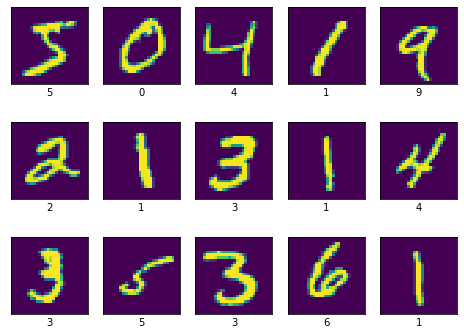

In [8]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_xlabel(y_train[i])
    ax.imshow(x_train[i,:,:,0])

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

0.0 1.0
0.0 1.0


In [10]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,
                 padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                147520    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

In [13]:
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = Adam(),
              metrics = ['accuracy'])

In [14]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.3
                    )

score = model.evaluate(x_test, y_test, verbose=0)
print('\n\nTest loss:', score[0])
print('Test accuracy:', score[1])

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 19s 441us/step - loss: 0.5614 - accuracy: 0.8272 - val_loss: 0.1169 - val_accuracy: 0.9642
Epoch 2/10
42000/42000 [==============================] - 18s 437us/step - loss: 0.1833 - accuracy: 0.9468 - val_loss: 0.0846 - val_accuracy: 0.9735
Epoch 3/10
42000/42000 [==============================] - 19s 448us/step - loss: 0.1359 - accuracy: 0.9601 - val_loss: 0.0636 - val_accuracy: 0.9808
Epoch 4/10
42000/42000 [==============================] - 18s 426us/step - loss: 0.1060 - accuracy: 0.9681 - val_loss: 0.0585 - val_accuracy: 0.9821
Epoch 5/10
42000/42000 [==============================] - 18s 427us/step - loss: 0.0927 - accuracy: 0.9714 - val_loss: 0.0545 - val_accuracy: 0.9839
Epoch 6/10
42000/42000 [==============================] - 19s 445us/step - loss: 0.0803 - accuracy: 0.9754 - val_loss: 0.0510 - val_accuracy: 0.9854
Epoch 7/10
42000/42000 [==============================] 

In [19]:
def plot_history(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

In [20]:
history.history

{'val_loss': [0.1169493331230349,
  0.08455715281930234,
  0.06358689891381396,
  0.05852388964924547,
  0.054531294361584715,
  0.05095863842881388,
  0.04768086427615748,
  0.047912825421740614,
  0.04370672649455567,
  0.047299545902707095],
 'val_accuracy': [0.9642221927642822,
  0.9735000133514404,
  0.9808333516120911,
  0.9821110963821411,
  0.9839444160461426,
  0.9854444265365601,
  0.9858333468437195,
  0.9857222437858582,
  0.9882222414016724,
  0.9866666793823242],
 'loss': [0.5613630756508736,
  0.18329206893557595,
  0.13590820536159334,
  0.10597927472279185,
  0.09269966884418612,
  0.08030748656498535,
  0.07548517547334943,
  0.06554145336718786,
  0.06432740237089317,
  0.05525270353896277],
 'accuracy': [0.82719046,
  0.9467857,
  0.96007144,
  0.96809524,
  0.9714286,
  0.97540474,
  0.9779286,
  0.9797619,
  0.9800238,
  0.983]}

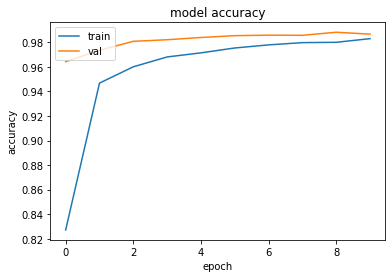

10000/10000 [==============================] - 1s 135us/step


Test loss: 0.03642641199100726
Test accuracy: 0.9871000051498413


In [21]:
plot_history(history)

score = model.evaluate(x_test, y_test, verbose=1)
print('\n\nTest loss:', score[0])
print('Test accuracy:', score[1])

In [22]:
model.save('my_model.h5')

saved_model = keras.models.load_model('my_model.h5')
pred_class = saved_model.predict_classes(x_test[0].reshape(-1, 28, 28, 1))
print(pred_class)

[7]


# Домашнее задание: fashion mnist

In [23]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [25]:
train_images.shape

(60000, 28, 28)

In [26]:
len(train_labels)

60000

In [27]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

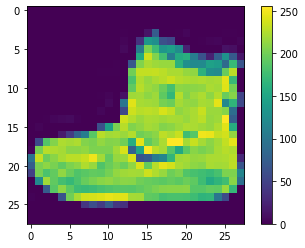

In [28]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [29]:
train_images = train_images / 255.0

test_images = test_images / 255.0

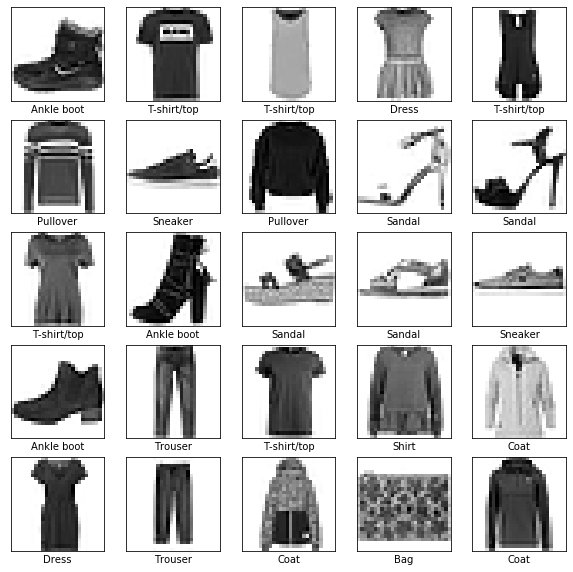

In [30]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Построим модель. Первый слой преобразует массим 28*28 в одномерный массив. Второй слой - полносвязный из 128 узлов, третий - также полносвязный, выдает вероятности принадлежности каждого наблюдения к одному из 10 классов.

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 92us/step - loss: 0.4963 - accuracy: 0.8259
Epoch 2/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.3703 - accuracy: 0.8665
Epoch 3/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.3346 - accuracy: 0.8780
Epoch 4/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.3134 - accuracy: 0.8863
Epoch 5/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.2947 - accuracy: 0.8917
Epoch 6/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.2803 - accuracy: 0.8960
Epoch 7/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.2698 - accuracy: 0.8990
Epoch 8/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.2568 - accuracy: 0.9046
Epoch 9/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.2466 - accuracy: 0.9080
Epoch 10/10
60000/60000 [==============================

In [34]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nТочность на проверочных данных:', test_acc)


Точность на проверочных данных: 0.8852999806404114


Точность на тестовом датасете ниже, что свидетельсвтует о переобучении модели.

Проверим предсказания модели

In [35]:
predictions = model.predict(test_images)

In [37]:
np.argmax(predictions[3])

1

In [38]:
test_labels[3]

1

In [39]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

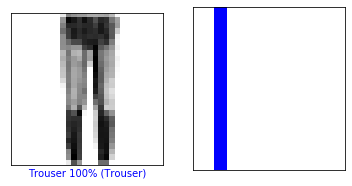

In [40]:
i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

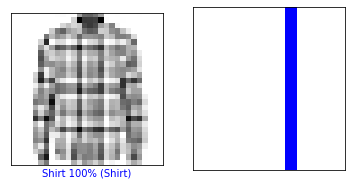

In [41]:
i = 7
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

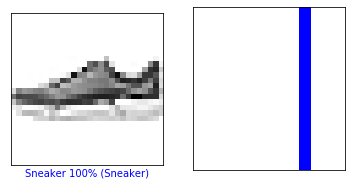

In [42]:
i = 9
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

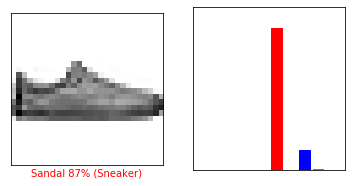

In [43]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

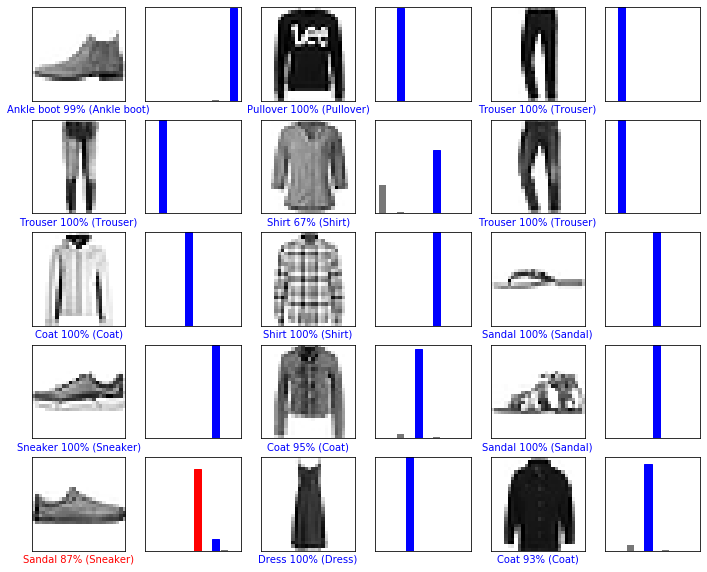

In [44]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [45]:
img = test_images[3]

print(img.shape)

(28, 28)


Так как модели в keras предсказывают данные, используя batch, нам даже единичное изображение необходимо добавить в список

In [47]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [48]:
predictions_single = model.predict(img)

print(predictions_single)

[[7.9954559e-09 9.9999952e-01 4.3856043e-09 5.0671269e-07 1.1305484e-08
  1.7832252e-12 1.9809363e-09 7.2463768e-17 1.8167278e-13 2.0246137e-15]]


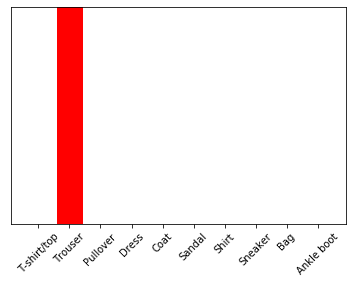

In [49]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [50]:
np.argmax(predictions_single[0])

1